# k-means algorithm with numpy
- We'll produce an animation of the k-means algorithm.
- 다음과 같이 진행한다.<br>
    1) initialize cluster centroids<br>
    2) repeat the following:<br>
    - for each point, compute which centroid is nearest to it
    - for each centroide, move its location to the mean location of the points assigned to it
- To implement the algorithm, we will start by defining a dataset to work with. We choose a dataset containing three clusters, with a little bit of variance around each cluster center. We construct the point cloud by stacking shifted random number:

In [1]:
#necessary imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

In [2]:
# np.vstack : 열의 개수가 같은 배열을 위아래로 연결하여 행 기준으로 확장
# np.hstack : 행의 수가 같은 배열을 가로로 연결하여 열 기준으로 확장
points = np.vstack(((np.random.randn(150, 2) * 0.75 + np.array([1, 0])),
                  (np.random.randn(50, 2) * 0.25 + np.array([-0.5, 0.5])),
                  (np.random.randn(50, 2) * 0.5 + np.array([-0.5, -0.5]))))

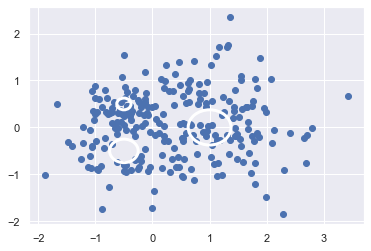

In [3]:
points.shape
plt.scatter(points[:, 0], points[:,1])
ax = plt.gca()
ax.add_artist(plt.Circle(np.array([1,0]), 0.75/2, fill=False, lw=3))
ax.add_artist(plt.Circle(np.array([-0.5,0.5]), 0.25/2, fill=False, lw=3))
ax.add_artist(plt.Circle(np.array([-0.5,-0.5]), 0.5/2, fill=False, lw=3))

- We now write a function that initializes k centroids by randomly selecting them from the data points.

In [4]:
def initialize_centroids(points, k):
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

In [5]:
initialize_centroids(points, 3)  # 셔플된 것에서 앞 3개

array([[-0.09305186,  0.29668028],
       [ 0.65846446,  1.01193863],
       [ 0.47534638,  0.06885763]])

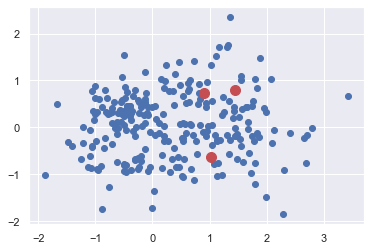

In [6]:
plt.scatter(points[:,0],points[:,1])
centroids = initialize_centroids(points, 3)
plt.scatter(centroids[:,0], centroids[:,1], c='r', s=100)

- Now let's define a function that returns the closest centroid for each point.
- We will use numpy broadcasting to do this.

In [7]:
def closest_centroid(points, centroids):
    """returns on array contraining the index to the nearest centroid for each point"""
    distances = np.sqrt(((points - centroids[:,np.newaxis])**2).sum(axis=2))
    #distances = np.sqrt(((points - centroids)**2))
    return np.argmin(distances, axis=0)

# np.newaxis 

In [8]:
c = initialize_centroids(points, 3)
closest_centroid(points, c)

array([2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0,
       1, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2,
       1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2,
       2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 1, 1, 2, 1, 2, 2, 1, 1, 0, 2, 2, 2, 0, 1, 0, 1, 2, 2, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

- So, why does the previous function work?
- It makes use of what I would call some advanced numpy broadcasing tricks
- 이 broadcasting을 좀더 상세하게 확인해보자. 
- 계산 프로세스 중간 스탭에 보면 첫번째, 변수 c는 작업하고자 하는 centroids롤 표시한다.

In [9]:
print(c)
print(c.shape)

[[-0.12022228  0.72953127]
 [-0.5024513  -0.81020425]
 [ 0.26711079 -0.2942028 ]]
(3, 2)


- np.newaxis를 통해 새로운 차원으로 배열을 확장할 수 있다.

In [10]:
c_extended = c[:,np.newaxis, :]
c_extended2 = c[np.newaxis, :, :]
#print(c_extended)
print(c_extended.shape)
#print(c_extended2)
print(c_extended2.shape)

(3, 1, 2)
(1, 3, 2)


- If the two arrays differ in their number of dimensions, the shape of the array with fewer dimensions is padded with ones on its leading (left) side.
- 두 배열의 차원수가 다른 경우 더 작은 차원의 배열 모양이 앞쪽(왼쪽)에 채워짐

In [11]:
p = points[0:2]
print(c_extended.shape)
print(p.shape)
print(c_extended)
print("================================")
print(p)

(3, 1, 2)
(2, 2)
[[[-0.12022228  0.72953127]]

 [[-0.5024513  -0.81020425]]

 [[ 0.26711079 -0.2942028 ]]]
[[ 0.78610051 -0.57300429]
 [ 0.24434022  1.33545178]]


In [12]:
print((c_extended - p).shape)
print(c_extended - p)

(3, 2, 2)
[[[-0.90632279  1.30253557]
  [-0.3645625  -0.6059205 ]]

 [[-1.2885518  -0.23719995]
  [-0.74679151 -2.14565602]]

 [[-0.51898972  0.27880149]
  [ 0.02277057 -1.62965458]]]


- This then allows us to apply squre root(sqrt), square and sum operations that efficiently reduce the number of dimensions of the matrix

In [15]:
sqrt_sum = np.sqrt(((points[:4] - c_extended)**2).sum(axis=2))
sqrt_sum

array([[1.58682699, 0.70713893, 1.56710839, 0.95090134],
       [1.31020211, 2.2719017 , 2.52629157, 2.17344758],
       [0.58913547, 1.62981365, 1.60699712, 1.33176537]])

- np.argmin을 통해 가장 가까운 중심의 지수를 얻음

In [17]:
np.argmin(sqrt_sum, axis=0)

array([2, 0, 0, 0], dtype=int64)

- 중심 평균 위치 이동

In [18]:
def move_centroids(points, closest, centroids):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

In [19]:
move_centroids(points, closest_centroid(points, c), c)

array([[-0.01073549,  0.68210919],
       [-0.70174093, -0.67372207],
       [ 1.10734464, -0.22422537]])

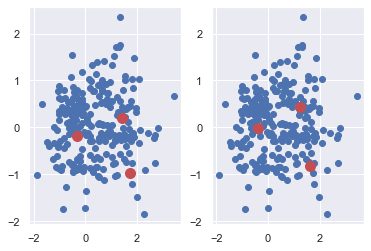

In [22]:
# 첫번째, 두번째 스텝 시각화
plt.subplot(121)
plt.scatter(points[:,0], points[:, 1])
centroids = initialize_centroids(points, 3)
plt.scatter(centroids[:,0], centroids[:,1], c='r', s=100)

plt.subplot(122)
plt.scatter(points[:,0], points[:,1])
closest = closest_centroid(points, centroids)
centroids = move_centroids(points, closest, centroids)
plt.scatter(centroids[:,0], centroids[:,1], c='r', s=100)

- JSAnimation을 통해 animate할 수 있다.

AttributeError: 'numpy.ndarray' object has no attribute 'decode'

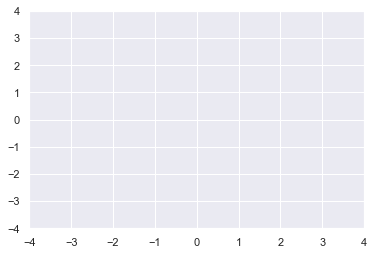

In [28]:
from JSAnimation import IPython_display
from matplotlib import animation

# create a simple animation
fig = plt.figure()
ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))
centroids = initialize_centroids(points, 3).decode('utf-8')

def init():
    return

def animate(i):
    global centroids
    closest = closest_centroid(points, centroids)
    centroids = move_centroids(points, closest, centroids)
    ax.cla()
    ax.scatter(points[:, 0], points[:, 1], c=closest)
    ax.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
    return 

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=10, interval=200, blit=True)

Traceback (most recent call last):
  File "C:\Anaconda3\envs\mytest\lib\site-packages\matplotlib\cbook\__init__.py", line 216, in process
    func(*args, **kwargs)
  File "C:\Anaconda3\envs\mytest\lib\site-packages\matplotlib\animation.py", line 953, in _start
    self._init_draw()
  File "C:\Anaconda3\envs\mytest\lib\site-packages\matplotlib\animation.py", line 1738, in _init_draw
    raise RuntimeError('The init_func must return a '
RuntimeError: The init_func must return a sequence of Artist objects.


TypeError: a bytes-like object is required, not 'str'

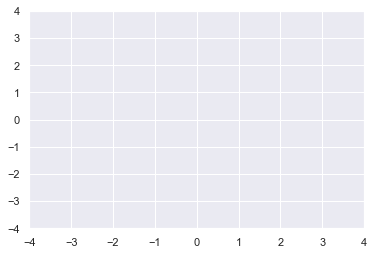

In [26]:
ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))
centroids = initialize_centroids(points, 7)

def init():
    return

def animate(i):
    global centroids
    closest = closest_centroid(points, centroids)
    centroids = move_centroids(points, closest, centroids)
    ax.cla()
    ax.scatter(points[:, 0], points[:, 1], c=closest)
    ax.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
    return 

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=30, interval=200, blit=True)